In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import DataAnalysis as da
import numpy as np
import re

The average number of general tweets per user is: 0.17986152003086356
The average number of mentions tweets per user is: 0.12668277528477737
The average number of retweets per user is: 1.183455501634551
The average number of replies per user is: 0.03423419764868322
[('Philae', 30553), ('ESA', 22531), ('esa', 4386), ('philae', 3258), ('esaoperations', 3116)]
[('philae', 33811), ('esa', 26938), ('esaoperations', 3122), ('nasa', 2477), ('bbcbreaking', 2177)]


In [2]:
pd.set_option('max_colwidth', 400)
df = pd.read_csv('./data/CleanedCometLanding.csv')

In [3]:
''' Plots a pie chart for the structure of the dataset (tweets/retweets/replies)'''

def visualiseStruct(df):
    tweetStructs = ['General tweets', 'Mentions', 'Retweets', 'Replies']
    proportions = []
    myExplode = [0, 0, 0.2, 0]

    proportions.append(da.getNumberOfGeneralTweets(df))
    proportions.append(da.getNumberOfMentionTweets(df))
    proportions.append(da.getNumberOfRetweets(df))
    proportions.append(da.getNumberOfReplies(df))
    
    fig1, ax1 = plt.subplots()
    ax1.pie(proportions, labels = tweetStructs, explode = myExplode, autopct='%1.1f%%', shadow = True)
    ax1.set_title('Structure Of The Dataset')
    plt.show()

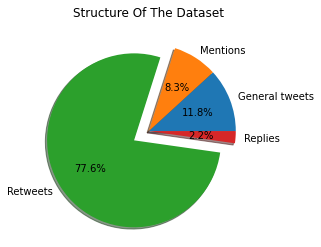

In [4]:
visualiseStruct(df)

In [5]:
''' Plots a word cloud given a dictionary'''
#https://www.geeksforgeeks.org/generating-word-cloud-python/
def createWordCloud(df):
    hashtags = []
    textColumn = df['text']
    mentionPattern = '@([a-zA-Z]+)'
    
    for (columnName, columnData) in textColumn.iteritems():  
        matchList = re.findall(mentionPattern , columnData)
        hashtags.extend(matchList)
        
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color='white',
                          stopwords= stopwords,
                          min_font_size = 10).generate(str(hashtags))

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
 
    plt.show()

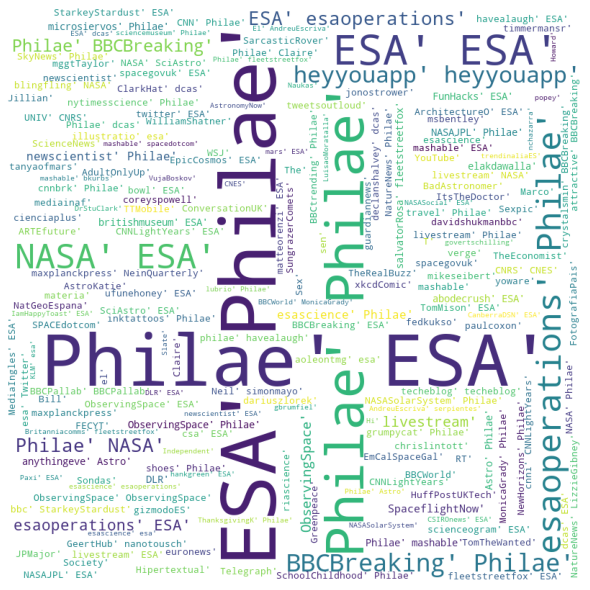

In [6]:
createWordCloud(df)